In [9]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.feature import local_binary_pattern
from sklearn.externals import joblib
from moviepy.editor import VideoFileClip
from sklearn.neural_network import MLPClassifier
from vehicleDetection import *
import glob
import time
%matplotlib inline 

In [2]:
cars = glob.glob('data/vehicles/**/*.png')
notcars = glob.glob('data/non-vehicles/**/*.png')

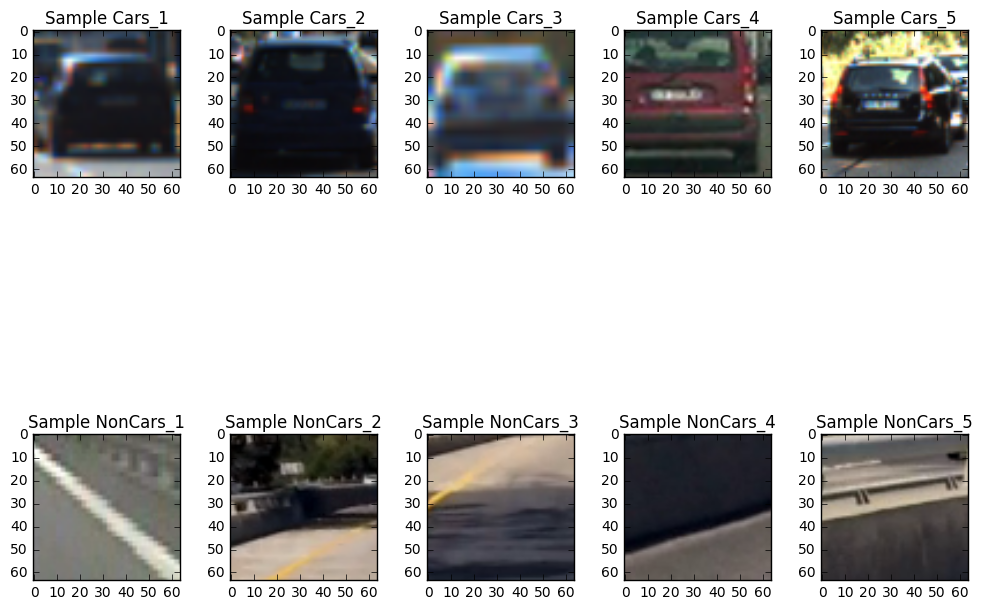

In [3]:
# Generate a random index to look at some images
ind_car = np.random.randint(0, len(cars),size=5)
ind_noncar = np.random.randint(0, len(notcars),size=5)
# Read in the image
_, ax = plt.subplots(2,5,figsize=(10,10))
for i in range(2):
    for j in range(5):
        if i == 0: 
            object = 'Cars'
            ax[i % 2, j % 5].imshow(mpimg.imread(cars[ind_car[j]]))
        else:
            object = 'NonCars'
            ax[i % 2, j % 5].imshow(mpimg.imread(notcars[ind_noncar[j]]))
        title = 'Sample {}_{}'.format(object,j+1)
        ax[i % 2, j % 5].set_title(title)
plt.tight_layout()

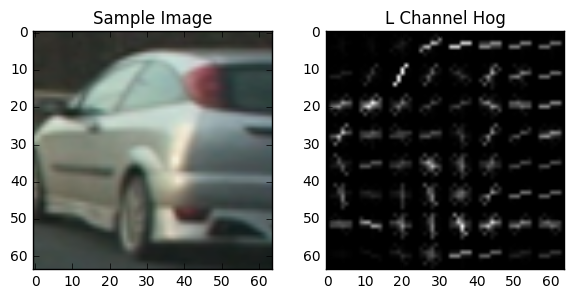

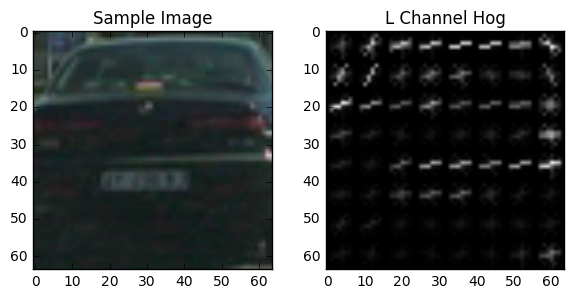

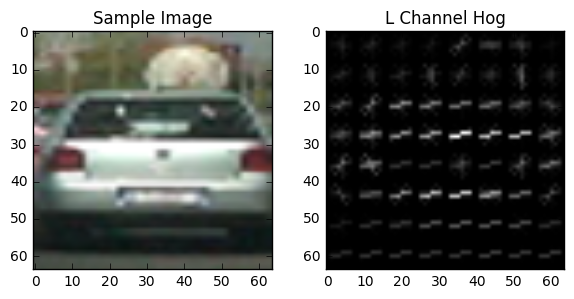

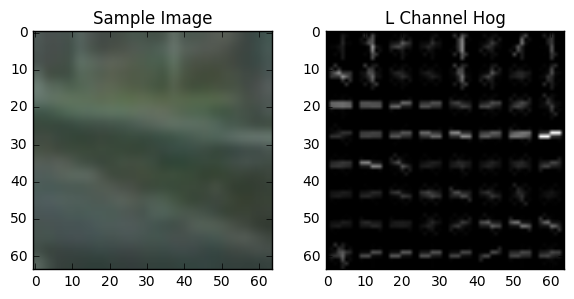

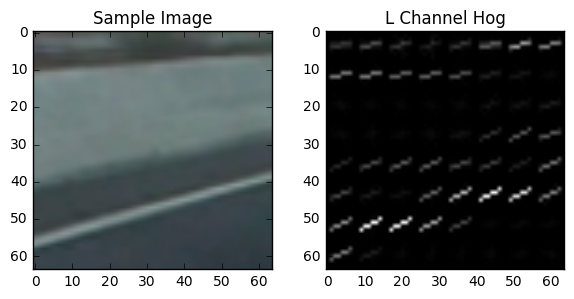

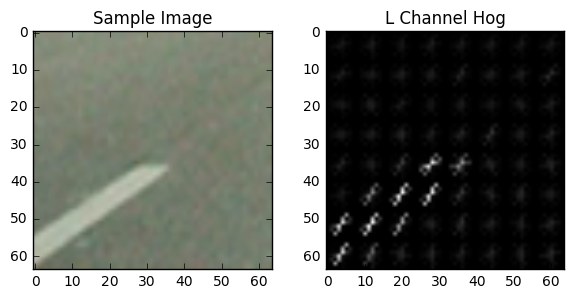

In [4]:
# Generate a random index to look at some images
ind = np.random.randint(0, len(cars),size=3)
# Read in the image
for i in ind:
    image1 = mpimg.imread(cars[i])
    image = cv2.cvtColor(image1, cv2.COLOR_RGB2LAB)
    _,hog_image = get_hog_features(image[:,:,0],9,8,2,vis=True)
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(6,6))
    f.tight_layout()
    ax1.imshow(image1)
    ax1.set_title('Sample Image')
    ax2.imshow(hog_image, cmap='gray')
    ax2.set_title('L Channel Hog')
for i in ind:
    image1 = mpimg.imread(notcars[i])
    image = cv2.cvtColor(image1, cv2.COLOR_RGB2LAB)
    _,hog_image = get_hog_features(image[:,:,0],9,8,2,vis=True)
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(6,6))
    f.tight_layout()
    ax1.imshow(image1)
    ax1.set_title('Sample Image')
    ax2.imshow(hog_image, cmap='gray')
    ax2.set_title('L Channel Hog')

In [ ]:
t=time.time()
cars = glob.iglob('data/vehicles/**/*.png')
cspace = 'LAB'
car_features = extract_features(cars, sb_cspace='LAB', spatial_size=(32, 32),
                     ht_cspace='LAB', hist_bins=32, hist_range=(0, 256),hg_cspace='LAB',
                     orient=9, pix_per_cell=8, cell_per_block=2, hog_channel=0,
                     useSpatialFeat = True, useHistFeat = True, useHogFeat = True, useLBP=False)

notcars = glob.iglob('data/non-vehicles/**/*.png')
notcar_features = extract_features(notcars, sb_cspace='LAB', spatial_size=(32, 32),
                     ht_cspace='LAB', hist_bins=32, hist_range=(0, 256),hg_cspace='LAB',
                     orient=9, pix_per_cell=8, cell_per_block=2, hog_channel=0,
                     useSpatialFeat = True, useHistFeat = True, useHogFeat = True, useLBP=False)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract features...')

In [ ]:
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)
print('Using spatial binning of:',32,'and', 32,'histogram bins' and 'color space LAB')
print('Feature vector length:', len(X_train[0]))

In [ ]:
mlp=MLPClassifier(random_state=54321)
t=time.time()
mlp.fit(X_train, y_train)
t2 = time.time()
print(t2-t, 'Seconds to train MLP...')
joblib.dump(mlp, 'test.pkl')
joblib.dump(X_scaler, 'test_scaler.pkl')

In [ ]:
mlp = joblib.load('best.pkl')
X_scaler = joblib.load('best_scaler.pkl')
# Check the score of the MLP
print('Train Accuracy of MLP = ', mlp.score(X_train, y_train))
print('Test Accuracy of MLP = ', mlp.score(X_test, y_test))
# Check the prediction time for a single sample
t=time.time()
prediction = mlp.predict(X_test[0].reshape(1, -1))
t2 = time.time()
print(t2-t, 'Seconds to predict with MLP')

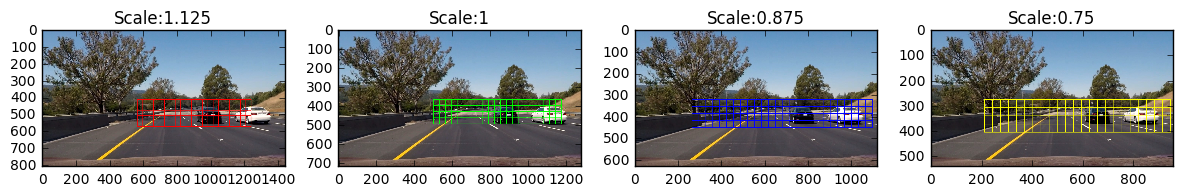

In [5]:
image = mpimg.imread('test_images/test6.jpg')
cspace = 'LAB'
detector = vehicleDetector(cspace, (720,1280), False)
detector.display_search_region(image)

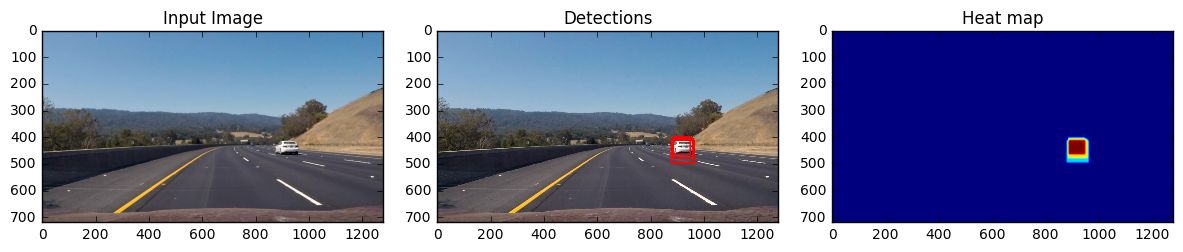

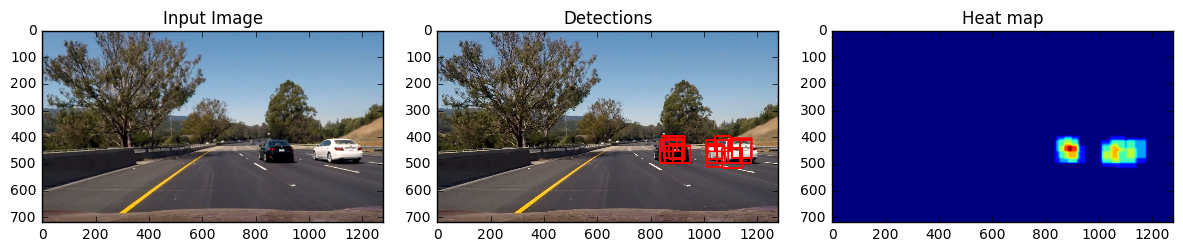

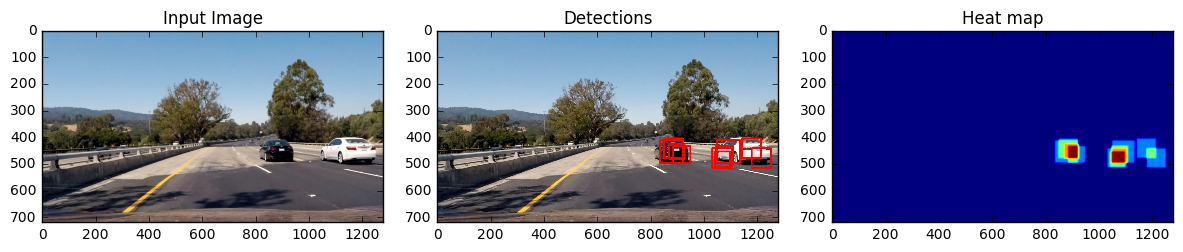

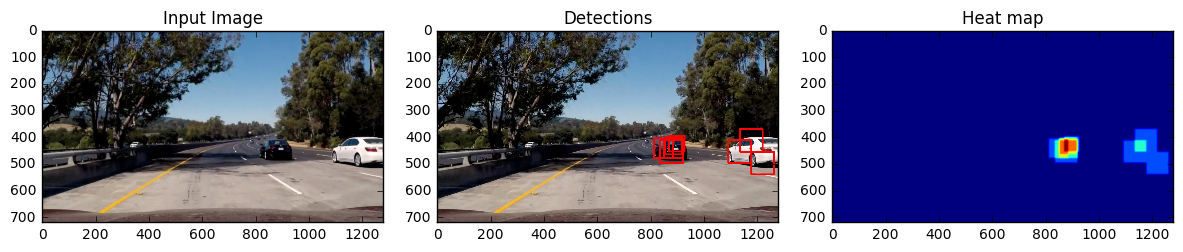

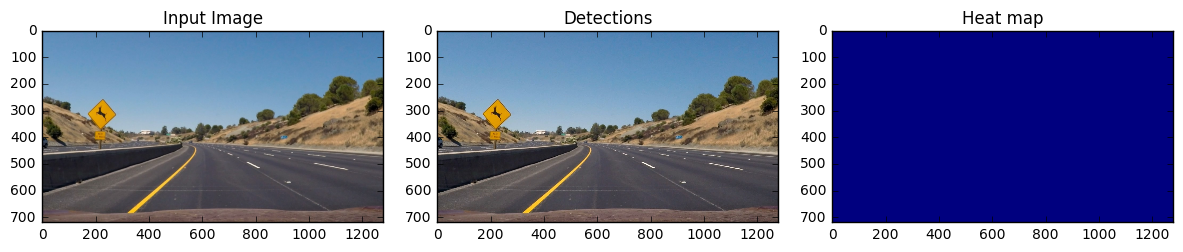

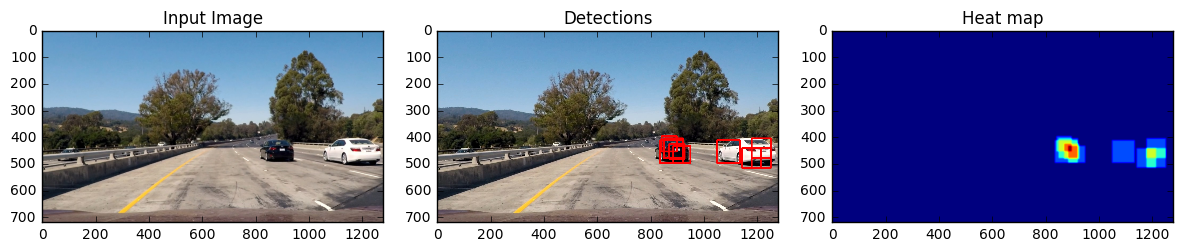

In [6]:
paths = glob.glob('test_images/*')
cspace = 'LAB'
for path in paths:
    image = mpimg.imread(path)
    draw_image = np.copy(image)
    detector = vehicleDetector(cspace, image.shape, True, True)
    draw_image = detector.process_frame(image)

0.5077061653137207 Seconds to detection a single frame
0.49062013626098633 Seconds to detection a single frame
0.4953646659851074 Seconds to detection a single frame
0.4895486831665039 Seconds to detection a single frame
0.48168349266052246 Seconds to detection a single frame
0.47031712532043457 Seconds to detection a single frame


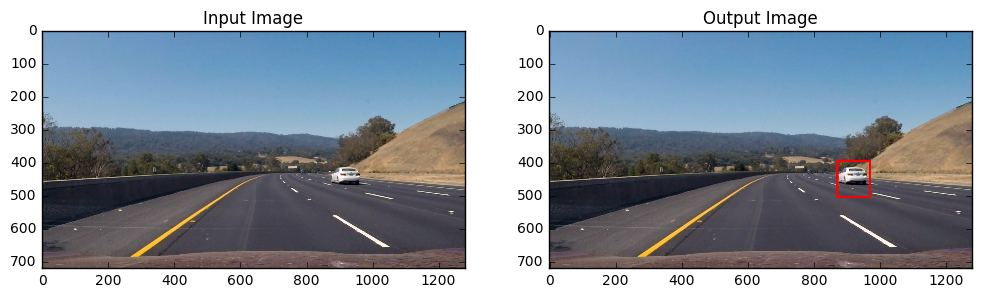

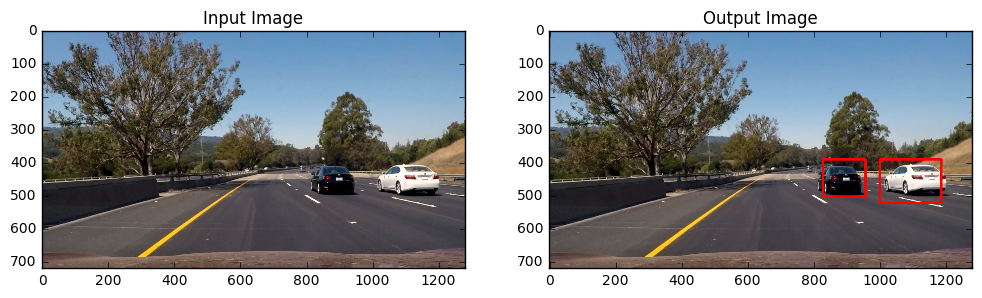

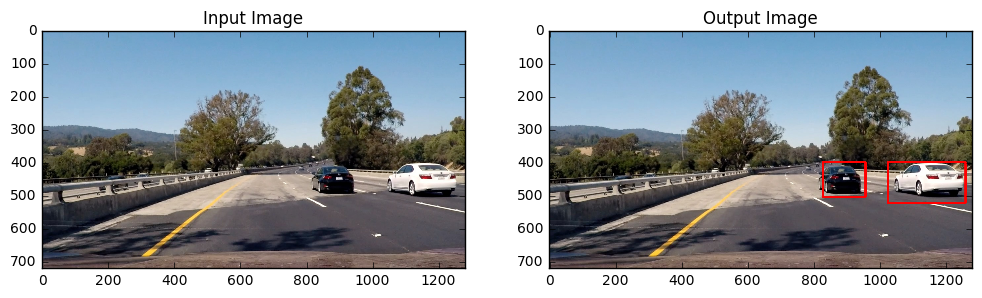

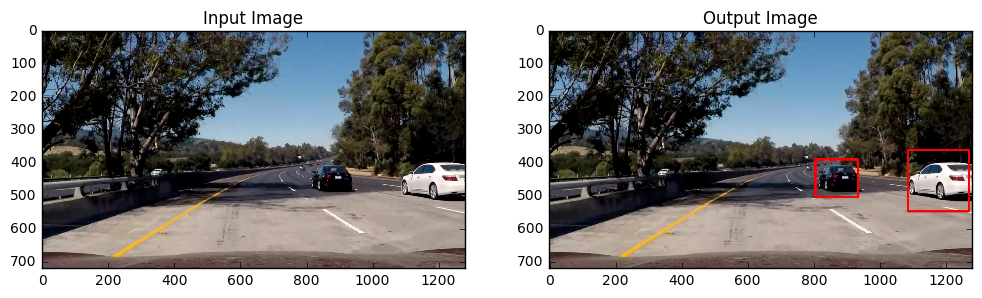

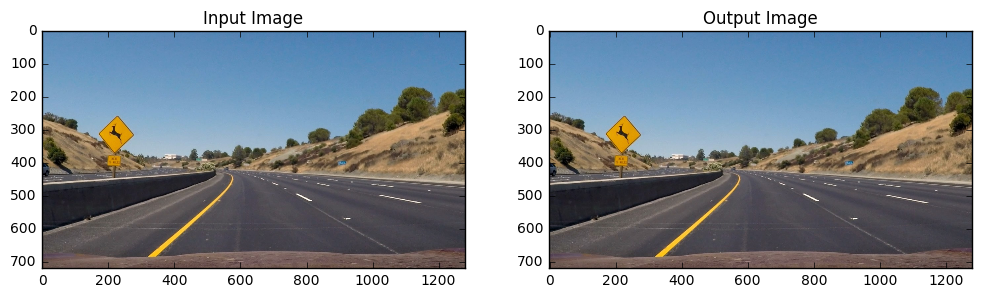

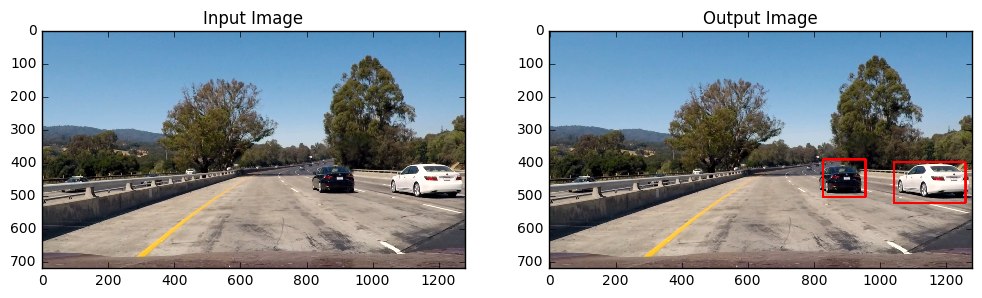

In [10]:
paths = glob.glob('test_images/*')
cspace = 'LAB'
for path in paths:
    image = mpimg.imread(path)
    draw_image = np.copy(image)
    detector = vehicleDetector(cspace, image.shape, True)
    t = time.time()
    draw_image = detector.process_frame(image)
    t2 = time.time()
    print(t2 - t, 'Seconds to detection a single frame')
    #draw_image = draw_boxes(draw_image,bbox)
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,12))
    ax1.imshow(image)
    ax1.set_title('Input Image')
    ax2.imshow(draw_image)
    ax2.set_title('Output Image')

In [ ]:
cspace = 'LAB'
detector = vehicleDetector(cspace, (720,1280), False)
output = 'project_video_car_detection.mp4'
clip1 = VideoFileClip("project_video.mp4") # The first 8 seconds doesn't have any cars...
clip = clip1.fl_image(detector.process_frame)
clip.write_videofile(output, audio=False)